# Solving the Poison Equation Using Finite Differnce Method for Rectengular Grids
The poisson equation has the general form
$$
\nabla^2 u(x,y) = f(x,y) \quad \nabla^2 = \partial_x^2 + \partial_y^2 
$$
We will approximate the laplace operator using the central difference operator $\Delta_0$
$$
\Delta_0z_k = z_{k+\frac{1}{2}} - z_{k-\frac{1}{2}}
$$
Then one can approximate the second derivative of a function with using the following second derivative operator $D^2$, which approximate it with the order of 2.
$$
D^2 = \frac{1}{2}\Delta_0^2 + \mathcal{O}(h^2)
$$
Hence, the laplace operator is
$$
\nabla^2 = \Delta_{0,x}^2 + \Delta_{0,y}^2
$$
Consequently, we have the following 5-point formula as our finite difference method.
$$
(\Delta x)^2f_{k,l} = u_{k+1,l} + u_{k-1,l} + u_{k,l+1} + u_{k,l-1} - 4u_{k,l} 
$$
### Note:
This method works only on recangular like grids.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [15]:
#Defining the boundry condition
N = 20
h = 1/N
u = np.zeros((N+1,N+1))
x = np.arange(0,1+h,h)
y = np.arange(0,1+h,h)

def f(x,y):
    return 100*(x**2+y**2)

# Defining Boundry Condition
Let suppose
$$
u[0,i] = u[N,i]  = 2sin(2 \pi y[i])\\
u[i,0] = u[i,N] = sin(2\pi x[i])\\ 
$$

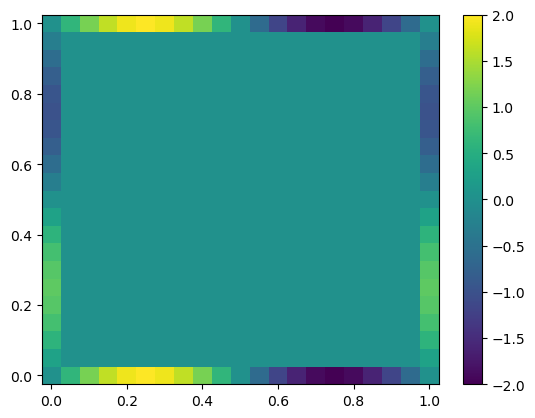

In [16]:
#Boundry Condition
for i in range(0,N):
    u[0,i] = 2*np.sin(2*np.pi*y[i])
    u[N,i] = 2*np.sin(2*np.pi*y[i])

for i in range(0,N):
    u[i,0] = np.sin(2*np.pi*x[i])
    u[i,N] = np.sin(2*np.pi*x[i])

plt.pcolormesh(x,y,u)
plt.colorbar()
plt.show()

# The algorithm for calculating the matrix A
$$
Au = b
$$
First, let $a_{ij}$ be the element of the A. Let $b_{k,l}$ and $u_{m,n}$ be the corresponding elements of u and b vectors. Then we have the following relation for the indexes
$$
i = (k-1)n + l
j = (m-1)n + s
$$
where n is the number of partition. This means after the $u_{m,n}$, we have $u_{m+1,1}$ element. Then the algorithm works as the following 
$$
(m = k\pm 1 \And s = l) \vee (m=k \And s = l \pm 1) \Rightarrow a_{i,j} = 1\
$$
$$
m = k \And l=s \Rightarrow a_{i,j} = -4
$$
Then from $i$ I calculate $k,l$ then check the above condition in the $j$ index using the given relation between $i,j$ and $k,l,m,s$

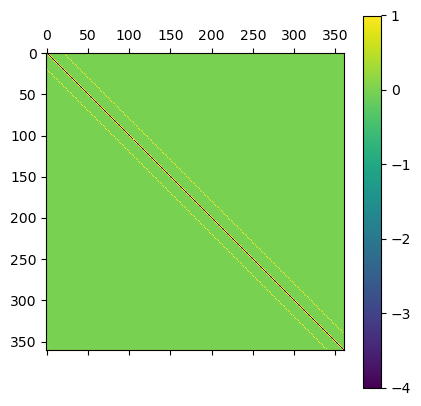

(361, 361)    (21, 21)


In [17]:
#Defining the A matrix
A = np.zeros(((N-1)**2,(N-1)**2))
for i in range(0,(N-1)**2):
    l = i%N
    k = (i-l)/N + 1
    for j in range(0,(N-1)**2):
        if i == j:
            A[i,j] = -4
        elif j == k*N + l or j == (k-2)*N+l:
            A[i,j] = 1
        elif j == (k-1)*N + l+1 or j == (k-1)*N+l-1:
            A[i,j] = 1
        else:
            pass
Ainv = np.linalg.inv(A)
plt.matshow(A)
plt.colorbar()
plt.show()
print(A.shape,"  ",u.shape)

(19, 19) (361, 1) (361, 361)


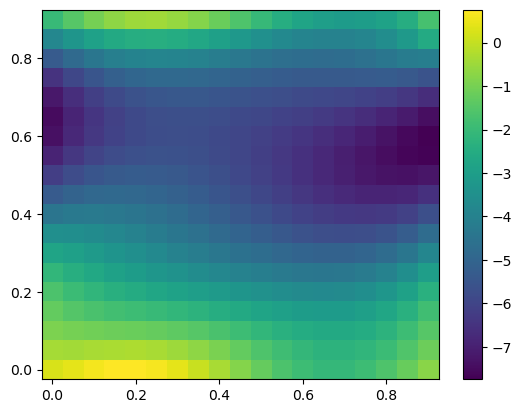

In [18]:
#Crating the vector F
x = np.arange(0,1-h,h)
y = np.arange(0,1-h,h)
X,Y =  np.meshgrid(x,y)
F = h**2*f(X,Y)
#Creating the b vectore
b = F
b[0,:] = F[0,:] - u[0,1:-1]
b[-1,:] = F[-1,:] - u[-1,1:-1]
b[:,0]  = F[:,0] - u[1:-1,0]
b[:,-1] = F[:,-1] - u[1:-1,-1]
bc = b.reshape(b.shape[0]**2,1)
print(b.shape,bc.shape,A.shape)
K = np.linalg.solve(A,bc)
Ks = K.reshape(F.shape[0],F.shape[1])
plt.pcolormesh(X,Y,Ks)
plt.colorbar()
plt.show()

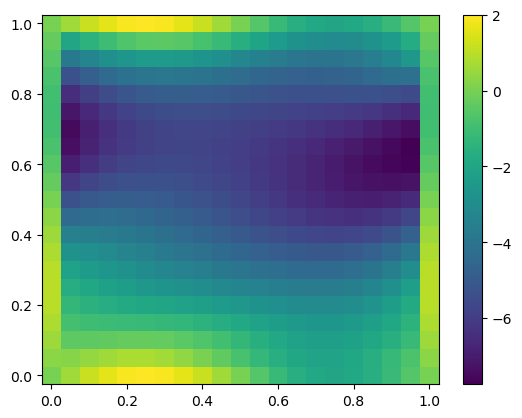

In [19]:
u[1:N,1:N] = Ks

x=np.arange(0,1+h,h)
y=np.arange(0,1+h,h)
X,Y = np.meshgrid(x,y)
plt.pcolormesh(X,Y,u)
plt.colorbar()
plt.show()

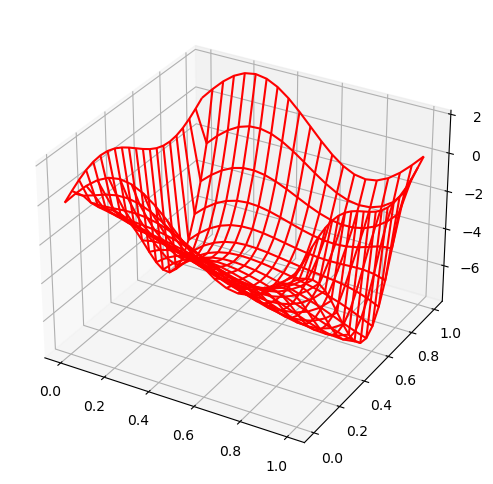

In [20]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d');
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, u,color='r');